In [2]:
import pandas as pd
import numpy as np

In [3]:
my_dict = {"Size": ["L", "L", "M", "M", "M", "S", "S", "S", "S"],
           "Type": ["A", "A", "B", "B", "B", "A", "B", "B", "B"],
           "Location": ["L1", "L1", "L1", "L2", "L2", "L1", "L2", "L2", "L1"],
           "A": [1, 2, 2, 3, 3, 4, 5, 6, 7],
           "B": [2, 4, 5, 5, 6, 6, 8, 9, 9]}
df = pd.DataFrame(my_dict)

In [4]:
dfr = pd.pivot_table(df, index=['Size', 'Type'], columns='Location', values='B')
dfr

Location    L1   L2
Size Type          
L    A     3.0  NaN
M    B     5.0  5.5
S    A     6.0  NaN
     B     9.0  8.5

In [5]:
dfr = pd.pivot_table(df, index=['Size', 'Type'], columns='Location', values='B')
dfr

Location    L1   L2
Size Type          
L    A     3.0  NaN
M    B     5.0  5.5
S    A     6.0  NaN
     B     9.0  8.5

## Agregar la mediana de las combinaciones

In [6]:
pd.pivot_table(df, index=['Size','Type'], columns='Location',
               values='B', aggfunc=np.median, fill_value=0)

C:\Users\Ricardo J\AppData\Local\Temp\ipykernel_27828\3542812676.py:1: FutureWarning: The provided callable <function median at 0x0000020A3F96B100> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  pd.pivot_table(df, index=['Size','Type'], columns='Location',


Location    L1   L2
Size Type          
L    A     3.0  0.0
M    B     5.0  5.5
S    A     6.0  0.0
     B     9.0  8.5

In [7]:
pd.pivot_table(df,index=['Size','Type'],values=['A','B'], 
               #función de agregación
               aggfunc={'A':np.max,'B':np.min})

C:\Users\Ricardo J\AppData\Local\Temp\ipykernel_27828\526826342.py:1: FutureWarning: The provided callable <function max at 0x0000020A3F888900> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pd.pivot_table(df,index=['Size','Type'],values=['A','B'],
C:\Users\Ricardo J\AppData\Local\Temp\ipykernel_27828\526826342.py:1: FutureWarning: The provided callable <function min at 0x0000020A3F888A40> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  pd.pivot_table(df,index=['Size','Type'],values=['A','B'],


A  B
Size Type      
L    A     2  2
M    B     3  5
S    A     4  6
     B     7  8

In [8]:
from sklearn.datasets import load_iris

In [9]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
df = pd.DataFrame(data = data.data, columns=data.feature_names)
df['target'] = data.target
df['species'] = data.target_names[data.target]

In [11]:
df.drop(columns='species').mean(axis=0)

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
target               1.000000
dtype: float64

In [12]:
df.select_dtypes(include='number').mean(axis=0)

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
target               1.000000
dtype: float64

In [13]:
#Correlación mide la relación entre dos variables el aumento entre ellas 
df.loc[:,'sepal length (cm)'].corr(df.loc[:,'sepal width (cm)'])

-0.11756978413300202

In [14]:
df.drop

<bound method DataFrame.drop of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8

In [15]:
np.round(df.drop(columns='species').corr(),3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000,-0.118,0.872,0.818,0.783
sepal width (cm),-0.118,1.000,-0.428,-0.366,-0.427
petal length (cm),0.872,-0.428,1.000,0.963,0.949
petal width (cm),0.818,-0.366,0.963,1.000,0.957
target,0.783,-0.427,0.949,0.957,1.000


# Aplicar métodos estadísticos haciendo selección

In [16]:
#Selección del data frame de la columna especie traiga las filas que corresponde a la setosa
#Calculas promedio de las columnas

df[df.species == 'setosa'].mean(numeric_only=True)

#numeric_only calcula el promedio unicamente de los datos numéricos
# Specie es la columna que es por cadenas y no numéricas por eso aplicamos ese 
# método, evitando el error

sepal length (cm)    5.006
sepal width (cm)     3.428
petal length (cm)    1.462
petal width (cm)     0.246
target               0.000
dtype: float64

In [17]:
datos = {
    'precio': [34, 54, np.nan, np.nan, 56, 12, 34],
    'cantidad_en_stock': [3, 6, 14, np.nan, 5, 2, 10],
    'productos_vendidos': [3, 45, 23, np.nan, 24, 6, np.nan]
}

df = pd.DataFrame(datos)
df.head(7)

,precio,cantidad_en_stock,productos_vendidos
0,34.0,3.0,3.0
1,54.0,6.0,45.0
2,NaN,14.0,23.0
3,NaN,NaN,NaN
4,56.0,5.0,24.0
5,12.0,2.0,6.0
6,34.0,10.0,NaN


In [18]:
mascara = df.isna() #Saber donde hay valores nulos
mascara

,precio,cantidad_en_stock,productos_vendidos
0,False,False,False
1,False,False,False
2,True,False,False
3,True,True,True
4,False,False,False
5,False,False,False
6,False,False,True


In [19]:
#Para columnas
df.isna().sum(axis=0) #Suma de la máscara booleanas utilizando ambos métodos

precio                2
cantidad_en_stock     1
productos_vendidos    2
dtype: int64

In [20]:
#Para filas
df.isna().sum(axis=1) 

0    0
1    0
2    1
3    3
4    0
5    0
6    1
dtype: int64

In [21]:
#Eliminar los valores nulos del dataframe
df.dropna(axis=0, how='any') #Si encuentra aunque sea un valor nulo

,precio,cantidad_en_stock,productos_vendidos
0,34.0,3.0,3.0
1,54.0,6.0,45.0
4,56.0,5.0,24.0
5,12.0,2.0,6.0


In [22]:
#Eliminar los valores nulos del dataframe
df.dropna(axis=0, how='all') #Si encuentraque todos sean valor nulo

,precio,cantidad_en_stock,productos_vendidos
0,34.0,3.0,3.0
1,54.0,6.0,45.0
2,NaN,14.0,23.0
4,56.0,5.0,24.0
5,12.0,2.0,6.0
6,34.0,10.0,NaN


In [23]:
df.dropna(axis=0, thresh=2) #Si encuentra que dos valores sean nulos

,precio,cantidad_en_stock,productos_vendidos
0,34.0,3.0,3.0
1,54.0,6.0,45.0
2,NaN,14.0,23.0
4,56.0,5.0,24.0
5,12.0,2.0,6.0
6,34.0,10.0,NaN


In [24]:
#Agregar una nueva columna
df['descuento'] = np.nan
df

,precio,cantidad_en_stock,productos_vendidos,descuento
0,34.0,3.0,3.0,NaN
1,54.0,6.0,45.0,NaN
2,NaN,14.0,23.0,NaN
3,NaN,NaN,NaN,NaN
4,56.0,5.0,24.0,NaN
5,12.0,2.0,6.0,NaN
6,34.0,10.0,NaN,NaN


In [25]:
df.dropna(axis=1, how='any')

""
0
1
2
3
4
5
6


# Buscamos eliminar todos los NaN en el DF

In [26]:
df_sin_nan = df.dropna(axis=1, how='all')
df_sin_nan = df_sin_nan.dropna(axis=0, how='all')
df_sin_nan

,precio,cantidad_en_stock,productos_vendidos
0,34.0,3.0,3.0
1,54.0,6.0,45.0
2,NaN,14.0,23.0
4,56.0,5.0,24.0
5,12.0,2.0,6.0
6,34.0,10.0,NaN


In [27]:
df_sin_nan['productos_vendidos'] = df_sin_nan['productos_vendidos'].fillna(0)
df_sin_nan

,precio,cantidad_en_stock,productos_vendidos
0,34.0,3.0,3.0
1,54.0,6.0,45.0
2,NaN,14.0,23.0
4,56.0,5.0,24.0
5,12.0,2.0,6.0
6,34.0,10.0,0.0


In [28]:
df_sin_nan['precio'] = df_sin_nan['precio'].fillna(df_sin_nan['precio'].mean())
df_sin_nan

,precio,cantidad_en_stock,productos_vendidos
0,34.0,3.0,3.0
1,54.0,6.0,45.0
2,38.0,14.0,23.0
4,56.0,5.0,24.0
5,12.0,2.0,6.0
6,34.0,10.0,0.0


# Vector One hot encoding

In [29]:
df = pd.DataFrame({'color':['red','blue','green','red','blue']})
one_hot = pd.get_dummies(df['color'])
one_hot

,blue,green,red
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True
4,True,False,False


In [30]:
one_hot_n1 = pd.get_dummies(df['color'], drop_first=True)
one_hot_n1

,green,red
0,False,True
1,False,False
2,True,False
3,False,True
4,False,False


In [31]:
df = pd.DataFrame({ 'c1': ['a', 'a', 'a', 'b', 'c', 'd'], 
                    'c2': [1, 1, 1, 2, 2, 1],
                    'c3': [1, 1, 2, 2, 2, 1]})
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,a,1,2
3,b,2,2
4,c,2,2
5,d,1,1


In [32]:
df_dup = df.duplicated()
df_dup

0    False
1     True
2    False
3    False
4    False
5    False
dtype: bool

In [33]:
df.duplicated(keep=False)

0     True
1     True
2    False
3    False
4    False
5    False
dtype: bool

In [34]:
df.duplicated(subset=['c1'])

0    False
1     True
2     True
3    False
4    False
5    False
dtype: bool

In [35]:
df2 = df.drop_duplicates()
df2

,c1,c2,c3
0,a,1,1
2,a,1,2
3,b,2,2
4,c,2,2
5,d,1,1


# Uso de gráficas

In [36]:
import matplotlib.pyplot as plt

In [37]:
x = np.random.randn(10000)*10+3
y = np.random.randn(10000)*10+5
z = np.random.randn(10000)*10+1

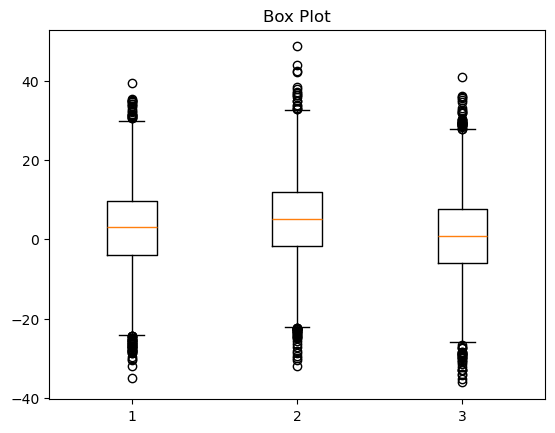

In [38]:
plt.boxplot([x,y,z])
plt.title('Box Plot')
plt.show()

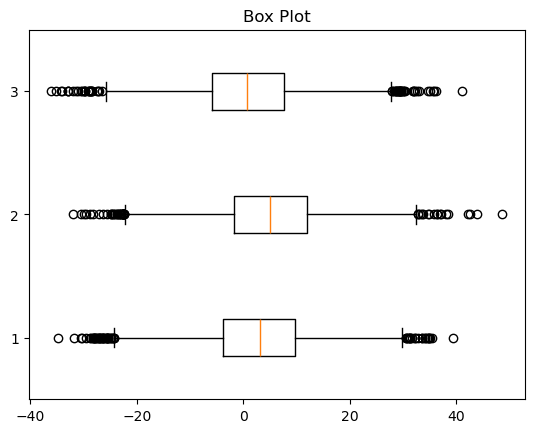

In [39]:
plt.boxplot([x,y,z],vert=False)
plt.title('Box Plot')
plt.show()

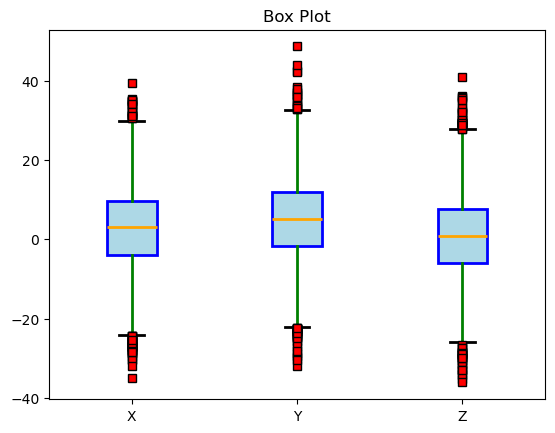

In [40]:
plt.boxplot([x,y,z], patch_artist=True,
            boxprops=dict(facecolor='lightblue',color='blue', linewidth=2, linestyle='--'),
            medianprops=dict(color='orange', linewidth=2), 
            whiskerprops=dict(color='green', linewidth=2),
            capprops=dict(color='black', linewidth=2),
            flierprops=dict(
                marker='s',
                markerfacecolor='red',
                markersize=6,
            ))
plt.title('Box Plot')
plt.xticks([1,2,3],['X','Y','Z'])
plt.show()

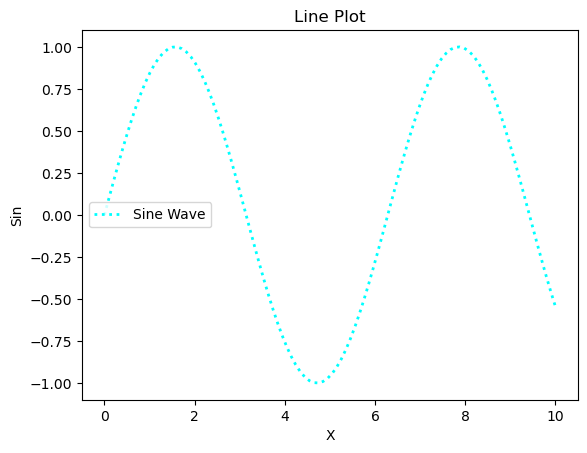

In [41]:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x, y, color='cyan', linewidth=2, linestyle=':', label='Sine Wave')
#plt.plot(y, x, color='orange', linewidth=2)
plt.title('Line Plot')
plt.xlabel('X')
plt.ylabel('Sin')
plt.legend(loc='center left')
plt.show()

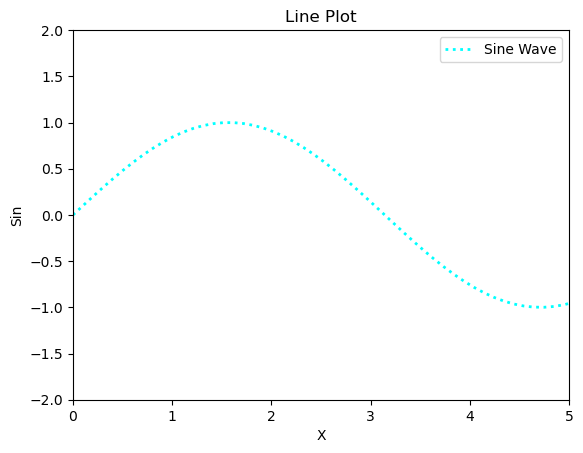

In [42]:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x, y, color='cyan', linewidth=2, linestyle=':', label='Sine Wave')
#plt.plot(y, x, color='orange', linewidth=2)
plt.title('Line Plot')
plt.xlabel('X')
plt.ylabel('Sin')
plt.xlim([0,5])
plt.ylim([-2,2])
plt.legend(loc='upper right')
plt.show()

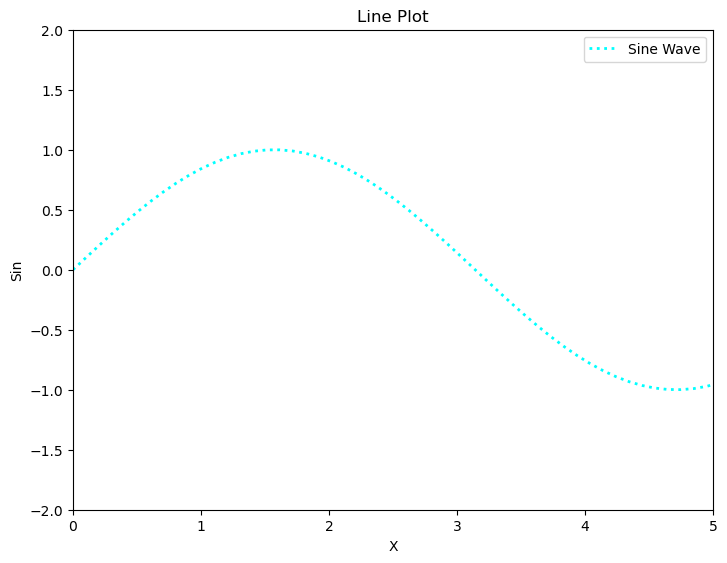

In [43]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, y, color='cyan', linewidth=2, linestyle=':', label='Sine Wave')
ax.set_title('Line Plot')
ax.set_xlabel('X')
ax.set_ylabel('Sin')
ax.set_xlim([0,5])
ax.set_ylim([-2,2])
ax.legend(loc = 'upper right')
plt.show()

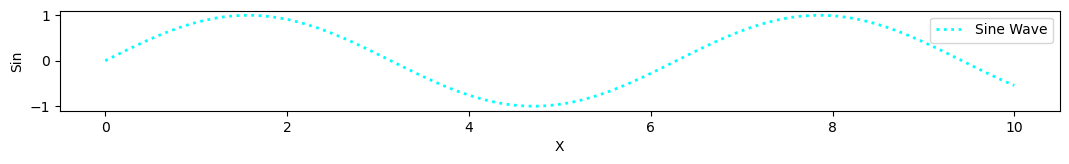

In [44]:
fig = plt.figure(figsize=(10,1))
ax = fig.add_axes([0,0,1,1])
ax.plot(x, y, color='cyan', linewidth=2, linestyle=':', label='Sine Wave')
ax.set_xlabel('X')
ax.set_ylabel('Sin')
ax.legend(loc = 'upper right')
plt.show()

In [45]:
z = np.cos(x)

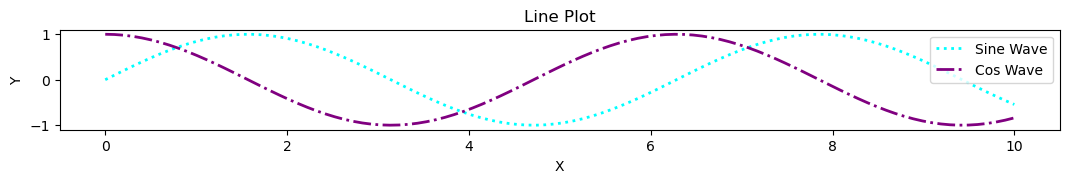

In [46]:
fig = plt.figure(figsize=(10,1))
ax = fig.add_axes([0,0,1,1])
ax.plot(x, y, color='cyan', linewidth=2, linestyle=':', label='Sine Wave')
ax.plot(x, z, color='purple', linewidth=2, linestyle='-.', label='Cos Wave')
ax.set_title('Line Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(loc = 'upper right')
plt.show()


In [47]:
fig.savefig('line_plot.png')